## Projeto Final do Módulo de Técnicas de Programação I
#### Descrição:
    Análise Exploratória de Dados de Vendas Online
### Regras:
- Aplicar o conhecimento de Numpy, Pandas e Git vistos em aula

#### Grupo composto por:
- Rayssa Vilaça



In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
clientes = pd.read_csv('assets/olist_customers_dataset.csv')
geolocalizacao = pd.read_csv('assets/olist_geolocation_dataset.csv')
pedido_itens = pd.read_csv('assets/olist_order_items_dataset.csv')
pedido_pagamentos = pd.read_csv('assets/olist_order_payments_dataset.csv')
pedido_avaliacoes = pd.read_csv('assets/olist_order_reviews_dataset.csv')
pedidos = pd.read_csv('assets/olist_orders_dataset.csv')
produtos = pd.read_csv('assets/olist_products_dataset.csv')
vendedores = pd.read_csv('assets/olist_sellers_dataset.csv')
traducao_nome_categoria_produto = pd.read_csv('assets/product_category_name_translation.csv')

### Análise Exploratória Inicial das Tabelas

#### Clientes

In [131]:
# Primeiramente, ver o conteúdo da tabela
clientes.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [132]:
print(f'A tabela clientes possui {clientes.shape[0]} linhas e {clientes.shape[1]} colunas')

A tabela clientes possui 99441 linhas e 5 colunas


In [133]:
# Ver o nome e o tipo de dados de cada coluna e verificar se há dados nulos ou faltantes
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [134]:
# Outra forma de verificar os dados faltantes
clientes.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [135]:
# Verificar a frequencia para as colunas categóricas cidade e estado
frequencia_clientes_por_cidade = clientes.value_counts('customer_city')
frequencia_clientes_por_cidade

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: count, Length: 4119, dtype: int64

In [136]:
frequencia_clientes_por_estado = clientes.value_counts('customer_state')
frequencia_clientes_por_estado

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

<Axes: title={'center': 'As Cinco Cidades com mais Clientes'}, xlabel='Cidades Brasileiras', ylabel='Número de Clientes'>

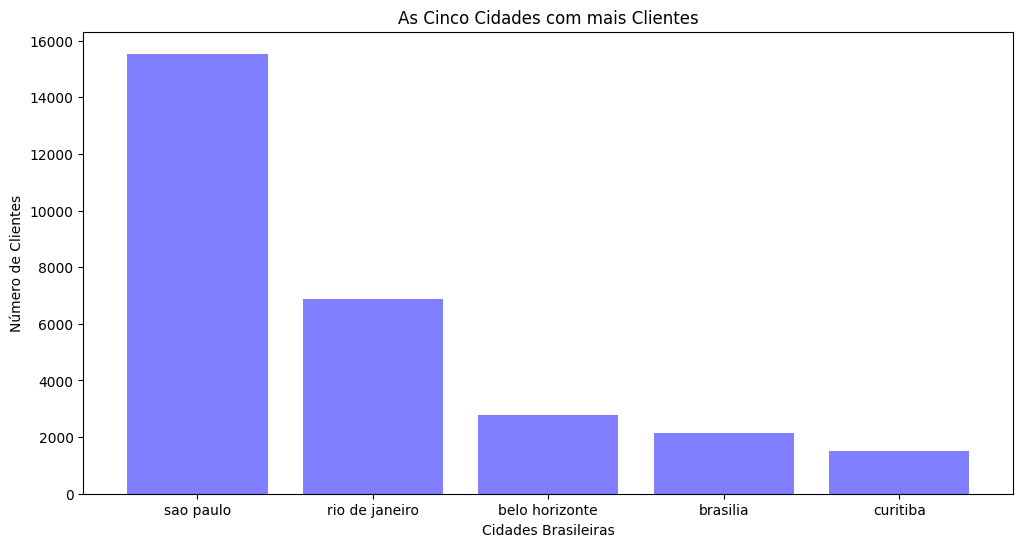

In [137]:
frequencia_clientes_por_cidade.nlargest(5).plot(kind='bar',
                                                title='As Cinco Cidades com mais Clientes',
                                                xlabel='Cidades Brasileiras',
                                                ylabel='Número de Clientes',
                                                rot=0,
                                                width=0.8,
                                                color='blue',
                                                alpha=0.5,
                                                figsize=(12, 6)
                                                )

<Axes: title={'center': 'Os Cinco Estados com mais Clientes'}, xlabel='Estados Brasileiros', ylabel='Número de Clientes'>

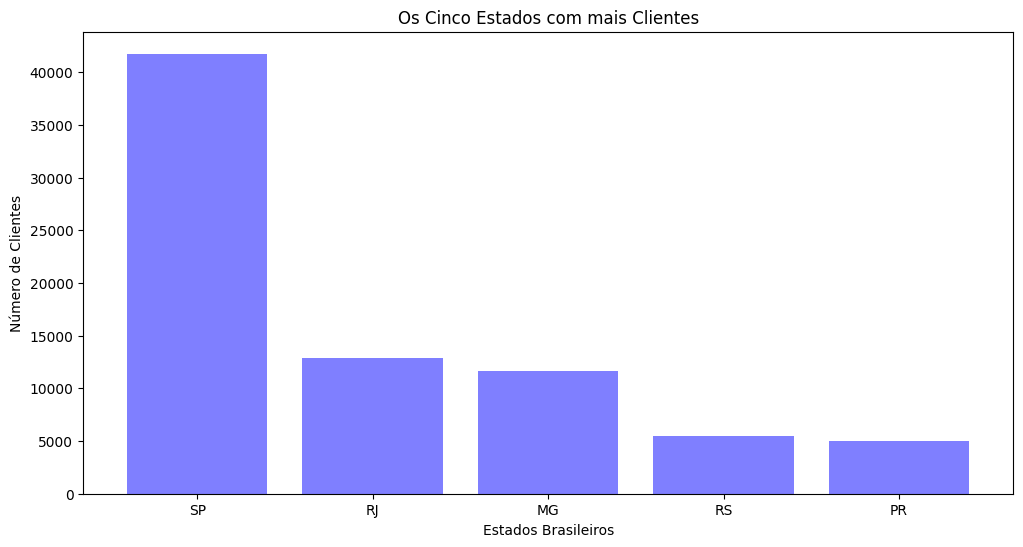

In [138]:
frequencia_clientes_por_estado.nlargest(5).plot(kind='bar',
                                                title='Os Cinco Estados com mais Clientes',
                                                xlabel='Estados Brasileiros',
                                                ylabel='Número de Clientes',
                                                rot=0,
                                                width=0.8,
                                                color='blue',
                                                alpha=0.5,
                                                figsize=(12, 6)
                                                )

#### Geolocalizacao

In [139]:
geolocalizacao.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [140]:
print(f'A tabela geolocalizacao possui {geolocalizacao.shape[0]} linhas e {geolocalizacao.shape[1]} colunas')

A tabela geolocalizacao possui 1000163 linhas e 5 colunas


In [141]:
geolocalizacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [142]:
geolocalizacao.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

#### Itens do Pedido

In [143]:
pedido_itens.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [144]:
print(f'A tabela pedido_itens possui {pedido_itens.shape[0]} linhas e {pedido_itens.shape[1]} colunas')

A tabela pedido_itens possui 112650 linhas e 7 colunas


In [145]:
pedido_itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [146]:
pedido_itens.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [147]:
# Resumo estatístico das colunas price e freight_value
pedido_itens[['price', 'freight_value']].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


In [148]:

resumo_estatistica_pedido_itens = pd.DataFrame()
resumo_estatistica_pedido_itens['Média'] = pedido_itens[['price', 'freight_value']].mean(numeric_only=True)
resumo_estatistica_pedido_itens['Mediana'] = pedido_itens[['price', 'freight_value']].median(numeric_only=True)
resumo_estatistica_pedido_itens['Moda'] = pedido_itens[['price', 'freight_value']].mode(numeric_only=True).T
resumo_estatistica_pedido_itens['Desvio Padrão'] = pedido_itens[['price', 'freight_value']].std(numeric_only=True)
resumo_estatistica_pedido_itens['Máximo'] = pedido_itens[['price', 'freight_value']].max(numeric_only=True)
resumo_estatistica_pedido_itens['Mínimo'] = pedido_itens[['price', 'freight_value']].min(numeric_only=True)
resumo_estatistica_pedido_itens

,Média,Mediana,Moda,Desvio Padrão,Máximo,Mínimo
price,120.653739,74.99,59.9,183.633928,6735.00,0.85
freight_value,19.990320,16.26,15.1,15.806405,409.68,0.00


#### Formas de pagamento

In [149]:
pedido_pagamentos.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [150]:
print(f'A tabela pedido_pagamentos possui {pedido_pagamentos.shape[0]} linhas e {pedido_pagamentos.shape[1]} colunas')

A tabela pedido_pagamentos possui 103886 linhas e 5 colunas


In [151]:
pedido_pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [152]:
pedido_pagamentos.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [153]:
frequencia_forma_pagamento = pedido_pagamentos.value_counts('payment_type')
frequencia_forma_pagamento

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

<Axes: title={'center': 'Quantidade de Pedidos por Método de Pagamento'}, xlabel='Formas de Pagamento', ylabel='Número de Pedidos'>

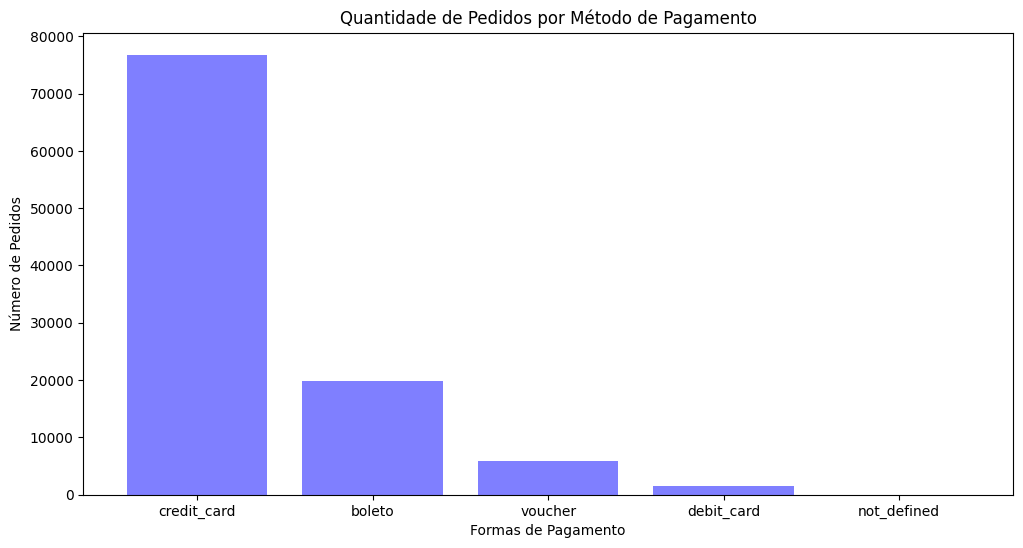

In [154]:
frequencia_forma_pagamento.plot(kind='bar',
                                title='Quantidade de Pedidos por Método de Pagamento',
                                xlabel='Formas de Pagamento',
                                ylabel='Número de Pedidos',
                                rot=0,
                                width=0.8,
                                color='blue',
                                alpha=0.5,
                                figsize=(12, 6)
                                )

In [155]:
pedido_pagamentos[['payment_installments', 'payment_value']].describe()

,payment_installments,payment_value
count,103886.000000,103886.000000
mean,2.853349,154.100380
std,2.687051,217.494064
min,0.000000,0.000000
25%,1.000000,56.790000
50%,1.000000,100.000000
75%,4.000000,171.837500
max,24.000000,13664.080000


In [156]:
resumo_estatistica_pedido_pagamento = pd.DataFrame()
resumo_estatistica_pedido_pagamento['Média'] = pedido_pagamentos[['payment_installments', 'payment_value']].mean(numeric_only=True)
resumo_estatistica_pedido_pagamento['Mediana'] = pedido_pagamentos[['payment_installments', 'payment_value']].median(numeric_only=True)
resumo_estatistica_pedido_pagamento['Moda'] = pedido_pagamentos[['payment_installments', 'payment_value']].mode(numeric_only=True).T
resumo_estatistica_pedido_pagamento['Desvio Padrão'] = pedido_pagamentos[['payment_installments', 'payment_value']].std(numeric_only=True)
resumo_estatistica_pedido_pagamento['Máximo'] = pedido_pagamentos[['payment_installments', 'payment_value']].max(numeric_only=True)
resumo_estatistica_pedido_pagamento['Mínimo'] = pedido_pagamentos[['payment_installments', 'payment_value']].min(numeric_only=True)
resumo_estatistica_pedido_pagamento

,Média,Mediana,Moda,Desvio Padrão,Máximo,Mínimo
payment_installments,2.853349,1.0,1.0,2.687051,24.00,0.0
payment_value,154.100380,100.0,50.0,217.494064,13664.08,0.0


#### Avaliação do Pedido

In [157]:
pedido_avaliacoes.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [158]:
print(f'A tabela pedido_avaliacoes possui {pedido_avaliacoes.shape[0]} linhas e {pedido_avaliacoes.shape[1]} colunas')

A tabela pedido_avaliacoes possui 99224 linhas e 7 colunas


In [159]:
pedido_avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [160]:
"""
Verificamos que há dados faltantes nas colunas review_comment_title e review_comment_message
Normalmente esses campos são opcionais quando um usuário realiza a avaliação de uma compra em um e-commerce
"""
pedido_avaliacoes.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [161]:
"""
O número de ordem_id únicos na tabela pedidos_avaliacoes é menor que o número total de registros.
Isso indica que, em alguns casos, houve mais de uma avaliação para o mesmo pedido. Na aba discussões do Kaggle,
observei que há perguntas a respeito, mas todas sem respostas. Desta forma, por não saber se há um erro no dataset
ou se há lógica por trás, optei por considerar todas as avaliações mesmo que repetidas
"""
pedido_avaliacoes['order_id'].unique().shape[0]

98673

In [162]:
frequencia_avaliacao_nota = pedido_avaliacoes.value_counts('review_score').sort_index()
frequencia_avaliacao_nota

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

In [163]:
frequencia_avaliacao_nota = frequencia_avaliacao_nota.reset_index()
frequencia_avaliacao_nota

,review_score,count
0,1,11424
1,2,3151
2,3,8179
3,4,19142
4,5,57328


In [164]:
# Criar labels para representar o nível de satisfação baseado nas notas dadas para cada pedido
labels = {1: 'Muito Ruim',
          2: 'Ruim',
          3: 'Normal',
          4: 'Bom',
          5: 'Muito Bom'}

frequencia_avaliacao_nota['review_score'] = frequencia_avaliacao_nota['review_score'].map(labels)
frequencia_avaliacao_nota

,review_score,count
0,Muito Ruim,11424
1,Ruim,3151
2,Normal,8179
3,Bom,19142
4,Muito Bom,57328


In [165]:
frequencia_avaliacao_nota.set_index('review_score', inplace=True)
frequencia_avaliacao_nota

,count
review_score,
Muito Ruim,11424
Ruim,3151
Normal,8179
Bom,19142
Muito Bom,57328


In [166]:
# Outra forma de renomear os índices com o mapeamento em labels
# frequencia_avaliacao_nota.index = frequencia_avaliacao_nota.index.map(labels)
# frequencia_avaliacao_nota

<Axes: title={'center': 'Frequência da Avaliação dos Pedidos'}, xlabel='Avaliação', ylabel='Número de Pedidos'>

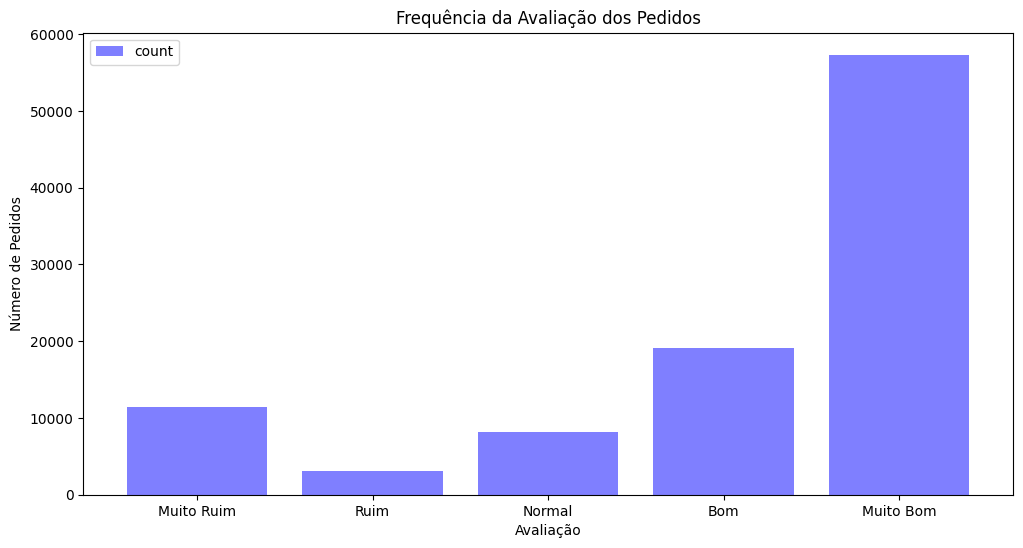

In [167]:
frequencia_avaliacao_nota.plot(kind='bar',
                                title='Frequência da Avaliação dos Pedidos',
                                xlabel='Avaliação',
                                ylabel='Número de Pedidos',
                                rot=0,
                                width=0.8,
                                color='blue',
                                alpha=0.5,
                                figsize=(12, 6)
                                )

#### Pedidos

In [168]:
pedidos.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [169]:
print(f'A tabela orders possui {pedidos.shape[0]} linhas e {pedidos.shape[1]} colunas')

A tabela orders possui 99441 linhas e 8 colunas


In [170]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [171]:
pedidos.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [172]:
"""
O status do pedido pode trazer informações interessantes que podem explicar o motivo de parte
dos valores nulos
""" 
pedidos_com_valores_nulos = pedidos.loc[pedidos['order_approved_at'].isnull()]
pedidos_com_valores_nulos.value_counts('order_status')

order_status
canceled     141
delivered     14
created        5
Name: count, dtype: int64

In [173]:
pedidos_com_valores_nulos = pedidos.loc[pedidos['order_delivered_carrier_date'].isnull()]
pedidos_com_valores_nulos.value_counts('order_status')

order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: count, dtype: int64

In [174]:
pedidos_com_valores_nulos = pedidos.loc[pedidos['order_delivered_customer_date'].isnull()]
pedidos_com_valores_nulos.value_counts('order_status')

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64

In [175]:
frequencia_status_pedido = pedidos.value_counts('order_status')
frequencia_status_pedido

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

<Axes: title={'center': 'Frequência dos Status do Pedido'}, xlabel='Status do Pedido', ylabel='Número de Pedidos'>

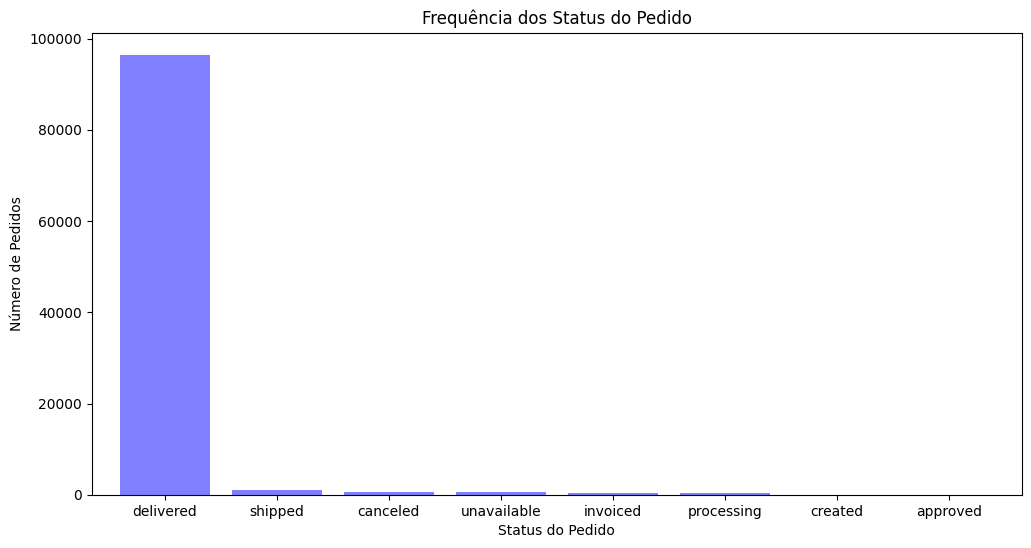

In [176]:
frequencia_status_pedido.plot(kind='bar',
                                title='Frequência dos Status do Pedido',
                                xlabel='Status do Pedido',
                                ylabel='Número de Pedidos',
                                rot=0,
                                width=0.8,
                                color='blue',
                                alpha=0.5,
                                figsize=(12, 6)
                                )

#### Produtos

In [177]:
produtos.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [178]:
print(f'A tabela produtos possui {produtos.shape[0]} linhas e {produtos.shape[1]} colunas')

A tabela produtos possui 32951 linhas e 9 colunas


In [179]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [180]:
produtos.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [181]:
# Remover os valores nulos
produtos.dropna(inplace=True)

In [182]:
produtos.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [183]:
categorias = produtos.product_category_name.unique()
print(f"Há {categorias.shape[0]} categorias diferentes. Sendo {', '.join(categorias[:5])}...")

Há 73 categorias diferentes. Sendo perfumaria, artes, esporte_lazer, bebes, utilidades_domesticas...


In [184]:
frequencia_categoria = produtos.value_counts('product_category_name')
frequencia_categoria

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

<Axes: title={'center': 'As Cinco Principais Categorias'}, xlabel='Categorias', ylabel='Número de Produtos'>

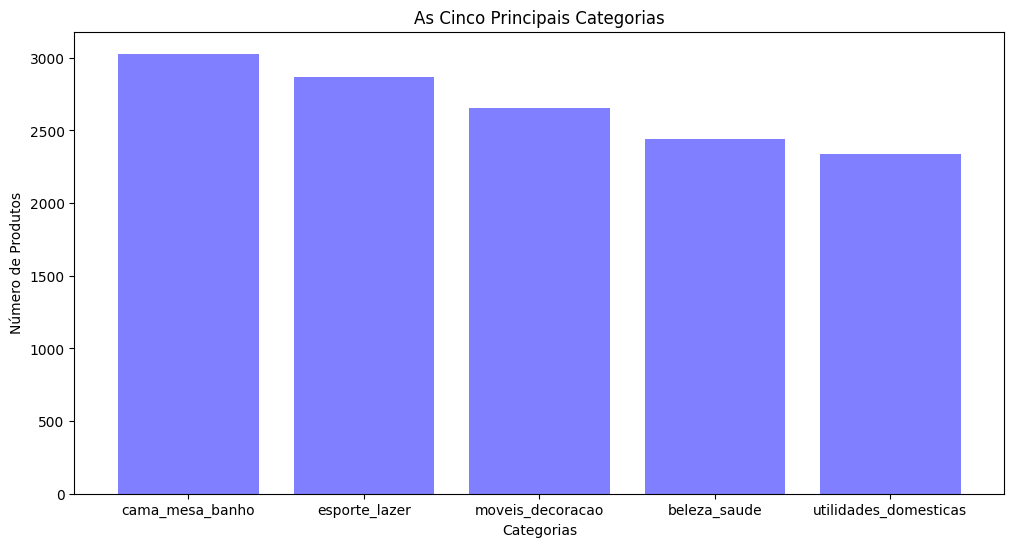

In [185]:
frequencia_categoria.nlargest(5).plot(kind='bar',
                                    title='As Cinco Principais Categorias',
                                    xlabel='Categorias',
                                    ylabel='Número de Produtos',
                                    rot=0,
                                    width=0.8,
                                    color='blue',
                                    alpha=0.5,
                                    figsize=(12, 6)
                                    )

In [186]:
produtos.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [187]:
resumo_estatistica_produtos = pd.DataFrame()
resumo_estatistica_produtos['Média'] = produtos.mean(numeric_only=True)
resumo_estatistica_produtos['Mediana'] = produtos.median(numeric_only=True)
resumo_estatistica_produtos['Moda'] = produtos.mode(numeric_only=True).T
resumo_estatistica_produtos['Desvio Padrão'] = produtos.std(numeric_only=True)
resumo_estatistica_produtos['Máximo'] = produtos.max(numeric_only=True)
resumo_estatistica_produtos['Mínimo'] = produtos.min(numeric_only=True)
resumo_estatistica_produtos

,Média,Mediana,Moda,Desvio Padrão,Máximo,Mínimo
product_name_lenght,48.476592,51.0,60.0,10.245699,76.0,5.0
product_description_lenght,771.492393,595.0,404.0,635.124831,3992.0,4.0
product_photos_qty,2.188961,1.0,1.0,1.736787,20.0,1.0
product_weight_g,2276.956586,700.0,200.0,4279.291845,40425.0,0.0
product_length_cm,30.854545,25.0,16.0,16.955965,105.0,7.0
product_height_cm,16.958813,13.0,10.0,13.636115,105.0,2.0
product_width_cm,23.208596,20.0,11.0,12.078762,118.0,6.0


#### Vendedores

In [188]:
vendedores.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [189]:
print(f'A tabela vendedores possui {vendedores.shape[0]} linhas e {vendedores.shape[1]} colunas')

A tabela vendedores possui 3095 linhas e 4 colunas


In [190]:
vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [191]:
vendedores.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [192]:
# Verificar a frequencia para as colunas categóricas cidade e estado
frequencia_vendedores_por_cidade = vendedores.value_counts('seller_city')
frequencia_vendedores_por_cidade

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: count, Length: 611, dtype: int64

In [193]:
frequencia_vendedores_por_estado = vendedores.value_counts('seller_state')
frequencia_vendedores_por_estado

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: count, dtype: int64

<Axes: title={'center': 'As Cinco Cidades com mais Vendedores'}, xlabel='Cidades Brasileiras', ylabel='Número de Vendedores'>

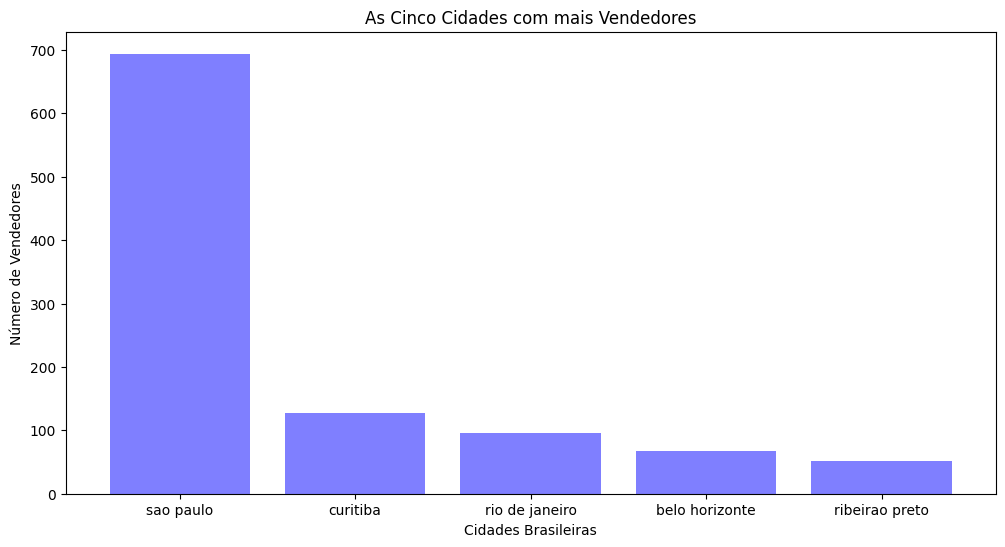

In [194]:
frequencia_vendedores_por_cidade.nlargest(5).plot(kind='bar',
                                                title='As Cinco Cidades com mais Vendedores',
                                                xlabel='Cidades Brasileiras',
                                                ylabel='Número de Vendedores',
                                                rot=0,
                                                width=0.8,
                                                color='blue',
                                                alpha=0.5,
                                                figsize=(12, 6)
                                                )

<Axes: title={'center': 'Os Cinco Estados com mais Vendedores'}, xlabel='Estados Brasileiros', ylabel='Número de Vendedores'>

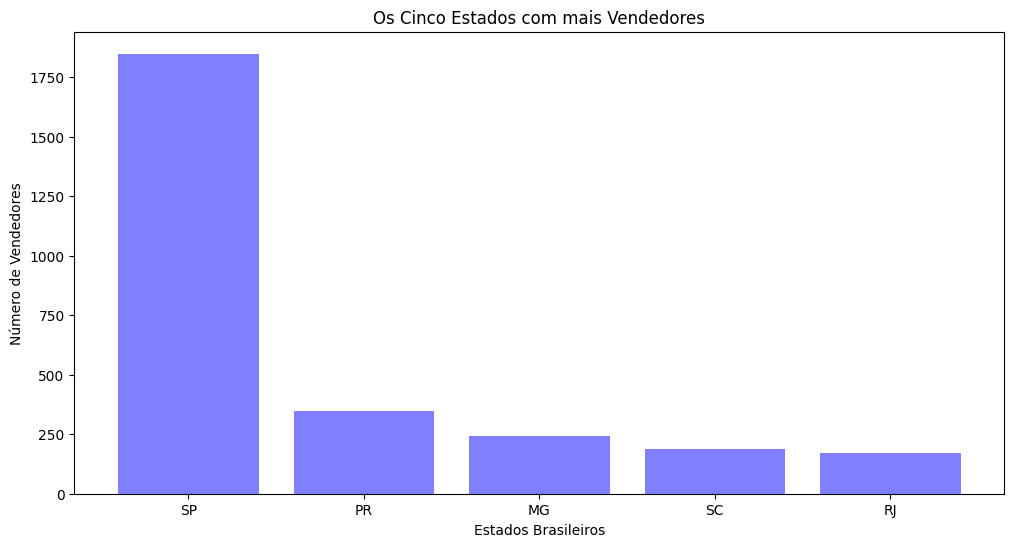

In [195]:
frequencia_vendedores_por_estado.nlargest(5).plot(kind='bar',
                                                title='Os Cinco Estados com mais Vendedores',
                                                xlabel='Estados Brasileiros',
                                                ylabel='Número de Vendedores',
                                                rot=0,
                                                width=0.8,
                                                color='blue',
                                                alpha=0.5,
                                                figsize=(12, 6)
                                                )

#### Tradução Nome da Categoria

In [196]:
traducao_nome_categoria_produto.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [197]:
print(f'A tabela tradução possui {traducao_nome_categoria_produto.shape[0]} linhas e {traducao_nome_categoria_produto.shape[1]} colunas')

A tabela tradução possui 71 linhas e 2 colunas


In [198]:
traducao_nome_categoria_produto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [199]:
traducao_nome_categoria_produto.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

### Perguntas

#### 1) Na tabela de pagamentos, há pagamentos do tipo “boleto” que tem mais de uma parcela (coluna payment_installments)?

In [200]:
# Como pode ser visto, não há pagamentos que respeitem as restrições impostas
pedido_pagamentos.loc[(pedido_pagamentos['payment_type'] == 'boleto') & (pedido_pagamentos['payment_installments'] > 1)]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [201]:
# Outra forma de fazer a consulta
pedido_pagamentos.query('payment_type == "boleto" and payment_installments > 1')

,order_id,payment_sequential,payment_type,payment_installments,payment_value


#### 2) Quais são exatamente os pagamentos que tem um valor maior ou menor do que o valor médio dos pagamentos registrados na tabela de pagamentos?

In [202]:
# Calcula a média dos valores dos pagamentos
valor_medio_pagamento = pedido_pagamentos['payment_value'].mean()
valor_medio_pagamento

154.10038041699553

In [203]:
# Busca os pagamentos cujo valor seja maior que a média
pedido_pagamentos.loc[pedido_pagamentos['payment_value'] > valor_medio_pagamento].sort_values('payment_value')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1849,4ff1875e3f8c120cfe6cef2ec1aca104,1,credit_card,4,154.11
92909,17ffb15bafcef073360c63f37fced606,1,credit_card,2,154.11
68318,bafb7839993d401fc28cbd78488ea03a,1,credit_card,8,154.11
39152,92d79acdfb2573ac9a4560ae039355d3,1,credit_card,4,154.12
13797,0b1652557b7b9bf7c885236e4798dd91,1,credit_card,7,154.12
...,...,...,...,...,...
85539,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88


In [204]:
# Busca os pagamentos cujo valor seja menor que a média
pedido_pagamentos.loc[pedido_pagamentos['payment_value'] < valor_medio_pagamento].sort_values('payment_value')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
...,...,...,...,...,...
45423,070a5949c100efc1ad56b852f5a278d0,1,credit_card,3,154.1
46996,f7886facb594e65f0c41cdbb0583b560,1,boleto,1,154.1
12620,a79c4dca347540e1263b2b750b92d8ab,1,boleto,1,154.1
32440,d0e215fdf1bf6d103e4b0c309767afc3,1,credit_card,3,154.1


In [205]:
# Busca os pagamentos cujo valor seja maior ou menor que a média
pedido_pagamentos.loc[(pedido_pagamentos['payment_value'] > valor_medio_pagamento) | (pedido_pagamentos['payment_value'] < valor_medio_pagamento)].sort_values('payment_value')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.00
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00
...,...,...,...,...,...
85539,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88


In [206]:
# Outra maneira de realizar a busca dos pagamentos cujo valor seja maior ou menor que a média
pedido_pagamentos.query(f'payment_value > {valor_medio_pagamento} or payment_value < {valor_medio_pagamento}').sort_values('payment_value')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.00
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00
...,...,...,...,...,...
85539,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88


#### 3)  Na tabela de clientes, quem são os clientes que provém de uma das 3 cidades mais comuns desta tabela?

In [207]:
tres_cidades_mais_comum = frequencia_clientes_por_cidade.iloc[:3].index.to_list()
tres_cidades_mais_comum

['sao paulo', 'rio de janeiro', 'belo horizonte']

In [208]:
clientes.loc[clientes['customer_city'].isin(tres_cidades_mais_comum)].sort_values('customer_city')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
61407,b03af535806e398922311291ae3e1f0f,0377f8402d448137ba33672d6318d8a9,30492,belo horizonte,MG
66070,9b97e240c29d2750738438d1e147daa7,45e1383f68227bf259f79319dcba791c,31570,belo horizonte,MG
87031,df94163aaf41dc29d2051c88b9b6aa17,99749d7ee01657cc0faeee7de4fea874,30310,belo horizonte,MG
19997,8676c80898b5fdcd9f7c48c39b000043,fa9ee193b074562663aa4c1ea3894e2d,30431,belo horizonte,MG
20026,01f831a3745969dca7b974014c4d4344,36fd23d5c40986f79525271e5e980310,30170,belo horizonte,MG
...,...,...,...,...,...
41104,c17ade8d5755b2f05c32066c18fed6dd,c038b0b7452e88cd1bc2e0ae5a405d2d,5427,sao paulo,SP
41101,612b779c8394301bc22771a63e4e7a0a,19f190b5d6d5121c8c6d2aecf2c7d98c,5791,sao paulo,SP
41099,5f5807b2902d221edab3af4b1268ab00,a8becdc52eb49044d9d158c4199ab1ad,4360,sao paulo,SP
41091,c74986f39d4600fcccc1a012403bbaa0,ab42daa0e23e5cab504e10e72209f085,5850,sao paulo,SP


In [209]:
clientes.loc[clientes['customer_city'].apply(lambda x: x in tres_cidades_mais_comum)].sort_values('customer_city')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
61407,b03af535806e398922311291ae3e1f0f,0377f8402d448137ba33672d6318d8a9,30492,belo horizonte,MG
66070,9b97e240c29d2750738438d1e147daa7,45e1383f68227bf259f79319dcba791c,31570,belo horizonte,MG
87031,df94163aaf41dc29d2051c88b9b6aa17,99749d7ee01657cc0faeee7de4fea874,30310,belo horizonte,MG
19997,8676c80898b5fdcd9f7c48c39b000043,fa9ee193b074562663aa4c1ea3894e2d,30431,belo horizonte,MG
20026,01f831a3745969dca7b974014c4d4344,36fd23d5c40986f79525271e5e980310,30170,belo horizonte,MG
...,...,...,...,...,...
41104,c17ade8d5755b2f05c32066c18fed6dd,c038b0b7452e88cd1bc2e0ae5a405d2d,5427,sao paulo,SP
41101,612b779c8394301bc22771a63e4e7a0a,19f190b5d6d5121c8c6d2aecf2c7d98c,5791,sao paulo,SP
41099,5f5807b2902d221edab3af4b1268ab00,a8becdc52eb49044d9d158c4199ab1ad,4360,sao paulo,SP
41091,c74986f39d4600fcccc1a012403bbaa0,ab42daa0e23e5cab504e10e72209f085,5850,sao paulo,SP


In [210]:
clientes.query(f'customer_city in {tres_cidades_mais_comum}').sort_values('customer_city')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
61407,b03af535806e398922311291ae3e1f0f,0377f8402d448137ba33672d6318d8a9,30492,belo horizonte,MG
66070,9b97e240c29d2750738438d1e147daa7,45e1383f68227bf259f79319dcba791c,31570,belo horizonte,MG
87031,df94163aaf41dc29d2051c88b9b6aa17,99749d7ee01657cc0faeee7de4fea874,30310,belo horizonte,MG
19997,8676c80898b5fdcd9f7c48c39b000043,fa9ee193b074562663aa4c1ea3894e2d,30431,belo horizonte,MG
20026,01f831a3745969dca7b974014c4d4344,36fd23d5c40986f79525271e5e980310,30170,belo horizonte,MG
...,...,...,...,...,...
41104,c17ade8d5755b2f05c32066c18fed6dd,c038b0b7452e88cd1bc2e0ae5a405d2d,5427,sao paulo,SP
41101,612b779c8394301bc22771a63e4e7a0a,19f190b5d6d5121c8c6d2aecf2c7d98c,5791,sao paulo,SP
41099,5f5807b2902d221edab3af4b1268ab00,a8becdc52eb49044d9d158c4199ab1ad,4360,sao paulo,SP
41091,c74986f39d4600fcccc1a012403bbaa0,ab42daa0e23e5cab504e10e72209f085,5850,sao paulo,SP


#### 4) Na tabela de reviews, crie uma coluna de booleanos que indique se a avaliação atingiu o valor mais alto (5) ou não.

In [211]:
pontuacoes = np.array(pedido_avaliacoes['review_score'].tolist())
pedido_avaliacoes['is_max_score_value'] = pontuacoes == 5
pedido_avaliacoes[['review_id', 'review_score', 'is_max_score_value']].head(10)

,review_id,review_score,is_max_score_value
0,7bc2406110b926393aa56f80a40eba40,4,False
1,80e641a11e56f04c1ad469d5645fdfde,5,True
2,228ce5500dc1d8e020d8d1322874b6f0,5,True
3,e64fb393e7b32834bb789ff8bb30750e,5,True
4,f7c4243c7fe1938f181bec41a392bdeb,5,True
5,15197aa66ff4d0650b5434f1b46cda19,1,False
6,07f9bee5d1b850860defd761afa7ff16,5,True
7,7c6400515c67679fbee952a7525281ef,5,True
8,a3f6f7f6f433de0aefbb97da197c554c,5,True
9,8670d52e15e00043ae7de4c01cc2fe06,4,False


In [212]:
pedido_avaliacoes['other_is_max_score_value'] = pedido_avaliacoes['review_score'] == 5
pedido_avaliacoes[['review_id', 'review_score', 'is_max_score_value', 'other_is_max_score_value']].head(10)

,review_id,review_score,is_max_score_value,other_is_max_score_value
0,7bc2406110b926393aa56f80a40eba40,4,False,False
1,80e641a11e56f04c1ad469d5645fdfde,5,True,True
2,228ce5500dc1d8e020d8d1322874b6f0,5,True,True
3,e64fb393e7b32834bb789ff8bb30750e,5,True,True
4,f7c4243c7fe1938f181bec41a392bdeb,5,True,True
5,15197aa66ff4d0650b5434f1b46cda19,1,False,False
6,07f9bee5d1b850860defd761afa7ff16,5,True,True
7,7c6400515c67679fbee952a7525281ef,5,True,True
8,a3f6f7f6f433de0aefbb97da197c554c,5,True,True
9,8670d52e15e00043ae7de4c01cc2fe06,4,False,False


#### 5) Na tabela de produtos você pode criar uma coluna categórica com valores como “pequeno”, “médio”, e “grande” para cada produto, a depender de ~~seus valores de height e width~~ seu volume.

In [213]:
"""
Defini as categorias com base nos volumes a seguir:
pequeno: menor que 5000 cm3
médio : entre 5000 cm3 e 50000 cm3
grande: maior que 50000 cm3
"""

pivo_inferior = 5000
pivo_superior = 50000

In [214]:
altura_produtos = np.array(produtos['product_height_cm'])
largura_produtos = np.array(produtos['product_width_cm'])
comprimento_produtos = np.array(produtos['product_length_cm'])

# Adicionei a coluna volume para me ajudar a conferir os valores da categoria na tabela original
volume_produtos = altura_produtos * largura_produtos * comprimento_produtos
produtos['product_volume_cm3'] = volume_produtos

categorias = volume_produtos.astype(str)

categorias[volume_produtos < pivo_inferior] = 'pequeno'
categorias[(volume_produtos >= pivo_inferior) & (volume_produtos <= pivo_superior)] = 'médio'
categorias[volume_produtos > pivo_superior] = 'grande'

produtos['size'] = categorias.tolist()
produtos[['product_id', 'product_height_cm', 'product_width_cm', 'product_length_cm', 'product_volume_cm3', 'size']].head(20)

,product_id,product_height_cm,product_width_cm,product_length_cm,product_volume_cm3,size
0,1e9e8ef04dbcff4541ed26657ea517e5,10.0,14.0,16.0,2240.0,pequeno
1,3aa071139cb16b67ca9e5dea641aaa2f,18.0,20.0,30.0,10800.0,médio
2,96bd76ec8810374ed1b65e291975717f,9.0,15.0,18.0,2430.0,pequeno
3,cef67bcfe19066a932b7673e239eb23d,4.0,26.0,26.0,2704.0,pequeno
4,9dc1a7de274444849c219cff195d0b71,17.0,13.0,20.0,4420.0,pequeno
5,41d3672d4792049fa1779bb35283ed13,5.0,11.0,38.0,2090.0,pequeno
6,732bd381ad09e530fe0a5f457d81becb,24.0,44.0,70.0,73920.0,grande
7,2548af3e6e77a690cf3eb6368e9ab61e,8.0,40.0,40.0,12800.0,médio
8,37cc742be07708b53a98702e77a21a02,13.0,17.0,27.0,5967.0,médio
9,8c92109888e8cdf9d66dc7e463025574,10.0,12.0,17.0,2040.0,pequeno


#### 6) Na tabela de produtos, crie uma coluna categórica com valores como “leve”, “moderado”, e “pesado” para cada produto, a depender de seu peso.

In [215]:
"""
Defini as categorias com base nos pesoas a seguir:
leve: menos de 500 gramas
moderado : entre 500 gramas e 2000 gramas
pesado: mais de 2000 gramas
"""

pivo_inferior = 500
pivo_superior = 2000

In [216]:
peso_produtos = np.array(produtos['product_weight_g'])

categorias = peso_produtos.astype(str)

categorias[peso_produtos < pivo_inferior] = 'leve'
categorias[(peso_produtos >= pivo_inferior) & (peso_produtos <= pivo_superior)] = 'moderado'
categorias[peso_produtos > pivo_superior] = 'pesado'

produtos['weight'] = categorias.tolist()
produtos[['product_id', 'product_weight_g', 'weight', 'size']].head(20)


,product_id,product_weight_g,weight,size
0,1e9e8ef04dbcff4541ed26657ea517e5,225.0,leve,pequeno
1,3aa071139cb16b67ca9e5dea641aaa2f,1000.0,moderado,médio
2,96bd76ec8810374ed1b65e291975717f,154.0,leve,pequeno
3,cef67bcfe19066a932b7673e239eb23d,371.0,leve,pequeno
4,9dc1a7de274444849c219cff195d0b71,625.0,moderado,pequeno
5,41d3672d4792049fa1779bb35283ed13,200.0,leve,pequeno
6,732bd381ad09e530fe0a5f457d81becb,18350.0,pesado,grande
7,2548af3e6e77a690cf3eb6368e9ab61e,900.0,moderado,médio
8,37cc742be07708b53a98702e77a21a02,400.0,leve,médio
9,8c92109888e8cdf9d66dc7e463025574,600.0,moderado,pequeno


#### 7) Verifique a correlação entre o volume e o peso do produto

In [217]:
"""
Valor próximo a 1, o que indica uma correlação positiva entre as variáveis.
Isso quer dizer que quando uma variável aumenta, a outra também tende a aumentar
""" 
correlacao_volume_peso_produto = produtos[['product_volume_cm3', 'product_weight_g']].corr()
correlacao_volume_peso_produto

,product_volume_cm3,product_weight_g
product_volume_cm3,1.000000,0.801891
product_weight_g,0.801891,1.000000


<Axes: xlabel='product_volume_cm3', ylabel='product_weight_g'>

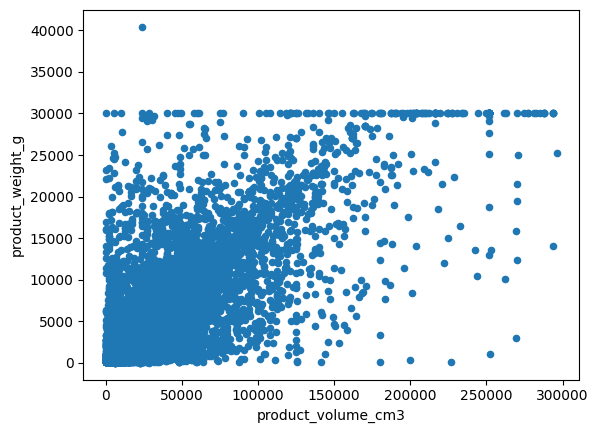

In [218]:
produtos.plot.scatter(x='product_volume_cm3',
                      y='product_weight_g')

#### 8) Busque a categoria que há mais vendas por vendedor

In [219]:
merge_pedido_itens_produto = pedido_itens.merge(produtos[['product_id', 'product_category_name']], how='left')
merge_pedido_itens_produto

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios


In [220]:
quantidade_categoria_vendedor = merge_pedido_itens_produto.value_counts(['seller_id', 'product_category_name']).reset_index()
quantidade_categoria_vendedor.head()

,seller_id,product_category_name,count
0,1f50f920176fa81dab994f9023523100,ferramentas_jardim,1882
1,6560211a19b47992c3666cc44a7e94c0,relogios_presentes,1628
2,4a3ca9315b744ce9f8e9374361493884,cama_mesa_banho,1572
3,1025f0e2d44d7041d6cf58b6550e0bfa,moveis_decoracao,1292
4,da8622b14eb17ae2831f4ac5b9dab84a,cama_mesa_banho,1277


In [221]:
# Primeira forma de mostrar a principal categoria por vendedor
indices = quantidade_categoria_vendedor.groupby(['seller_id'])['count'].idxmax()
principal_categoria_vendedor = quantidade_categoria_vendedor.loc[indices].sort_values('seller_id', ascending=False).loc[:, ['seller_id', 'product_category_name']]
principal_categoria_vendedor

,seller_id,product_category_name
1704,ffff564a4f9085cd26170f4732393726,automotivo
455,fffd5413c0700ac820c7069d66d98c89,utilidades_domesticas
1295,ffeee66ac5d5a62fe688b9d26f83f534,eletrodomesticos
1072,ffdd9f82b9a447f6f8d4b91554cc7dd3,utilidades_domesticas
5071,ffcfefa19b08742c5d315f2791395ee5,livros_interesse_geral
...,...,...
107,004c9cd9d87a3c30c522c48c4fc07416,cama_mesa_banho
394,002100f778ceb8431b7a1020ff7ab48f,moveis_decoracao
5064,001e6ad469a905060d959994f1b41e4f,esporte_lazer
76,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim


In [222]:
"""
 Segunda forma de mostrar a principal categoria por vendedor
 Usei o fato do value_counts ordenar pela frequência para aplicar
 o drop_duplicates, uma vez que por padrão esse método irá manter a primeira ocorrência de
 duplicatas, e por estar ordenado, a primeira ocorrência do seller_id é justamente o registro
 da categoria mais vendida por aquele vendedor
"""
other_principal_categoria_vendedor = quantidade_categoria_vendedor.drop_duplicates('seller_id').sort_values('seller_id', ascending=False).loc[:, ['seller_id', 'product_category_name']]
other_principal_categoria_vendedor

,seller_id,product_category_name
1704,ffff564a4f9085cd26170f4732393726,automotivo
455,fffd5413c0700ac820c7069d66d98c89,utilidades_domesticas
1295,ffeee66ac5d5a62fe688b9d26f83f534,eletrodomesticos
1072,ffdd9f82b9a447f6f8d4b91554cc7dd3,utilidades_domesticas
5071,ffcfefa19b08742c5d315f2791395ee5,livros_interesse_geral
...,...,...
107,004c9cd9d87a3c30c522c48c4fc07416,cama_mesa_banho
394,002100f778ceb8431b7a1020ff7ab48f,moveis_decoracao
5064,001e6ad469a905060d959994f1b41e4f,esporte_lazer
76,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim


In [223]:
principal_categoria_vendedor.equals(other_principal_categoria_vendedor)

True

#### 9) Mostre o total de itens na tabela order_items por vendedor

In [224]:
pedido_itens.groupby('seller_id')['order_id'].count()

seller_id
0015a82c2db000af6aaaf3ae2ecb0532      3
001cca7ae9ae17fb1caed9dfb1094831    239
001e6ad469a905060d959994f1b41e4f      1
002100f778ceb8431b7a1020ff7ab48f     55
003554e2dce176b5555353e4f3555ac8      1
                                   ... 
ffcfefa19b08742c5d315f2791395ee5      1
ffdd9f82b9a447f6f8d4b91554cc7dd3     20
ffeee66ac5d5a62fe688b9d26f83f534     14
fffd5413c0700ac820c7069d66d98c89     61
ffff564a4f9085cd26170f4732393726     20
Name: order_id, Length: 3095, dtype: int64

#### 10) Os cinco produtos mais caros da loja

In [225]:
"""
Como em order_items o mesmo produto pode ser vendido por preços diferentes (dado que 
em determinados momentos há promoções), decidi calcular a média dos preços para 
cada produto para depois determinar os cinco mais caros
"""
preco_medio_produtos = pedido_itens.groupby('product_id')[['price', 'freight_value']].mean()
preco_medio_produtos

,price,freight_value
product_id,,
00066f42aeeb9f3007548bb9d3f33c38,101.65,18.590
00088930e925c41fd95ebfe695fd2655,129.90,13.930
0009406fd7479715e4bef61dd91f2462,229.00,13.100
000b8f95fcb9e0096488278317764d19,58.90,19.600
000d9be29b5207b54e86aa1b1ac54872,199.00,19.270
...,...,...
fff6177642830a9a94a0f2cba5e476d1,114.99,27.705
fff81cc3158d2725c0655ab9ba0f712c,90.00,7.890
fff9553ac224cec9d15d49f5a263411f,32.00,11.850


In [226]:
preco_medio_produtos.sort_values('price', ascending=False).iloc[:5]

,price,freight_value
product_id,,
489ae2aa008f021502940f251d4cce7f,6735.0,194.31
69c590f7ffc7bf8db97190b6cb6ed62e,6729.0,193.21
1bdf5e6731585cf01aa8169c7028d6ad,6499.0,227.66
a6492cc69376c469ab6f61d8f44de961,4799.0,151.34
c3ed642d592594bb648ff4a04cee2747,4690.0,74.34


In [227]:
preco_medio_produtos.nlargest(5, 'price')

,price,freight_value
product_id,,
489ae2aa008f021502940f251d4cce7f,6735.0,194.31
69c590f7ffc7bf8db97190b6cb6ed62e,6729.0,193.21
1bdf5e6731585cf01aa8169c7028d6ad,6499.0,227.66
a6492cc69376c469ab6f61d8f44de961,4799.0,151.34
c3ed642d592594bb648ff4a04cee2747,4690.0,74.34


#### 11) Valor total pago por pedido

In [228]:
total_pedido = pedido_pagamentos.groupby('order_id')['payment_value'].sum()
total_pedido

order_id
00010242fe8c5a6d1ba2dd792cb16214     72.19
00018f77f2f0320c557190d7a144bdd3    259.83
000229ec398224ef6ca0657da4fc703e    216.87
00024acbcdf0a6daa1e931b038114c75     25.78
00042b26cf59d7ce69dfabb4e55b4fd9    218.04
                                     ...  
fffc94f6ce00a00581880bf54a75a037    343.40
fffcd46ef2263f404302a634eb57f7eb    386.53
fffce4705a9662cd70adb13d4a31832d    116.85
fffe18544ffabc95dfada21779c9644f     64.71
fffe41c64501cc87c801fd61db3f6244     55.79
Name: payment_value, Length: 99440, dtype: float64

##### Exemplo para conferir

In [229]:
# Buscar um pedido que tenha utilizado mais de uma forma de pagamento
id_pedido = pedido_pagamentos.loc[pedido_pagamentos['payment_sequential'] > 1].iloc[0, 0]
pedido_pagamentos.loc[pedido_pagamentos['order_id'] == id_pedido]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
25,5cfd514482e22bc992e7693f0e3e8df7,2,voucher,1,45.17
57742,5cfd514482e22bc992e7693f0e3e8df7,1,credit_card,4,665.41


In [230]:
# Verificar se a soma dos valores dos diferentes métodos para um pedido bate com o resultado encontrado
total_pedido[id_pedido]

710.5799999999999

#### 12) Quantidade de produtos por categoria, tamanho e peso

In [231]:
produtos.groupby(['product_category_name', 'size', 'weight'])['product_id'].count()

product_category_name      size     weight  
agro_industria_e_comercio  grande   moderado      2
                                    pesado       22
                           médio    leve          2
                                    moderado      9
                                    pesado       20
                                               ... 
utilidades_domesticas      médio    moderado    797
                                    pesado      477
                           pequeno  leve        310
                                    moderado    258
                                    pesado       23
Name: product_id, Length: 453, dtype: int64